# **Sentimen Analisis Bahasa Indonesia Menggunakan Python**

## Data Cleansing & Preparation

### Mengakses Dataset

In [ ]:
from google.colab import drive
#Membuka akses ke google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/Sentimen Analisis/Bagyo-Supardjo_25_Sept.csv")
df.head()

,Unnamed: 0,screen_name,lang,created_at,fav_count,retweet_count,text,location
0,0,jawapos,in,2020-09-25 03:01:40,1,0,"Gibran-Teguh 1, Bagyo-Supardjo 2, Sama-sama Ya...","Gedung Graha Pena Lt.10, Jl. Raya Kebayoran La..."
1,1,JoniArizal1,in,2020-09-24 20:59:33,0,3,RT @detikcom: Dua pasangan calon (paslon) Pilk...,NaN
2,2,detikcom,in,2020-09-24 19:50:51,7,3,Dua pasangan calon (paslon) Pilkada Solo mengi...,"Jakarta, Indonesia"
3,3,StalistS,in,2020-09-24 19:48:19,0,18,RT @FatimahSw33ty: 😇🤲Selamat pagi Assalamu'ala...,NaN
4,4,jawapos,in,2020-09-24 14:20:58,3,0,"Gibran-Teguh 1, Bagyo-Supardjo 2, Sama-Sama Pe...","Gedung Graha Pena Lt.10, Jl. Raya Kebayoran La..."


In [ ]:
tweet_data0=df.text
tweet_data0

0     Gibran-Teguh 1, Bagyo-Supardjo 2, Sama-sama Ya...
1     RT @detikcom: Dua pasangan calon (paslon) Pilk...
2     Dua pasangan calon (paslon) Pilkada Solo mengi...
3     RT @FatimahSw33ty: 😇🤲Selamat pagi Assalamu'ala...
4     Gibran-Teguh 1, Bagyo-Supardjo 2, Sama-Sama Pe...
                            ...                        
76    RT @kumparan: Apa saja kisah 5 warga Solo yang...
77    Pasangan Bagyo Wahyono dan FX Supardjo (Bajo) ...
78    Apa saja kisah 5 warga Solo yang rela menyerah...
79    Begini Cara KPU Verifikasi 38.831 KTP Warga So...
80    RT @VriGim: Meski Rival dlm Pencalonan... Namu...
Name: text, Length: 81, dtype: object

In [ ]:
#Menghapus teks yang sama
tweet_data = list(dict.fromkeys(tweet_data0))
print(tweet_data)
print(len(tweet_data0))
print(len(tweet_data))

['Gibran-Teguh 1, Bagyo-Supardjo 2, Sama-sama Yakin Menang Pilkada Solo https://t.co/FMg0IUXr8g', 'RT @detikcom: Dua pasangan calon (paslon) Pilkada Solo mengikuti tahapan pengundian nomor urut. Gibran Rakabuming Raka-Teguh Prakosa mendap…', 'Dua pasangan calon (paslon) Pilkada Solo mengikuti tahapan pengundian nomor urut. Gibran Rakabuming Raka-Teguh Prak… https://t.co/OMWTVs8Ohc', "RT @FatimahSw33ty: 😇\U0001f932Selamat pagi Assalamu'alaikum wr wb Semoga kita selalu patuhi Protokol kesehatan agar terhindar dari Covid19. Tagar ha…", 'Gibran-Teguh 1, Bagyo-Supardjo 2, Sama-Sama Pede Menang Pilkada Solo https://t.co/CVShWTfNmc', 'RT @myCaffe0: Gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nSeru juga nih lau kayak gini..jd lbh asyik dan hidu…', 'Gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nSeru juga nih lau kayak gini..jd lbh asyi… https://t.co/px9GHlBQYo', '@_AwasiPilkada \nDua pasangan calon walikota di The Sunan Hotel Solo.\nPas

### Case Folding



Case folding adalah salah satu bentuk text preprocessing yang paling sederhana dan efektif meskipun sering diabaikan. Tujuan dari case folding untuk mengubah semua huruf dalam dokumen menjadi huruf kecil. Hanya huruf ‘a’ sampai ‘z’ yang diterima. Karakter selain huruf dihilangkan dan dianggap delimiter. 

Ada beberapa cara yang dapat digunakan dalam tahap case folding, diantaranya:
* Mengubah text menjadi lowercase
* Menghapus alamat web
* Menghapus emotikon
* Menghapus angka
* Menghapus akun name
* Menghapus rt tag
* Menghapus tanda baca
* Menghapus whitepace (karakter kosong)


In [ ]:
#Mengubah text menjadi lowercase
tweet_data_1=[]
for teks in tweet_data:
  teks_process = [teks.lower()]
  tweet_data_1=tweet_data_1+teks_process
print(tweet_data_1)
#tweet_data_1

['gibran-teguh 1, bagyo-supardjo 2, sama-sama yakin menang pilkada solo https://t.co/fmg0iuxr8g', 'rt @detikcom: dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prakosa mendap…', 'dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prak… https://t.co/omwtvs8ohc', "rt @fatimahsw33ty: 😇\U0001f932selamat pagi assalamu'alaikum wr wb semoga kita selalu patuhi protokol kesehatan agar terhindar dari covid19. tagar ha…", 'gibran-teguh 1, bagyo-supardjo 2, sama-sama pede menang pilkada solo https://t.co/cvshwtfnmc', 'rt @mycaffe0: gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyik dan hidu…', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyi… https://t.co/px9ghlbqyo', '@_awasipilkada \ndua pasangan calon walikota di the sunan hotel solo.\npas

In [ ]:
#Menghapus alamat web
tweet_data_2=[]
for teks in tweet_data_1:
  teks_process = [re.sub(r"http\S+", "", teks)]
  tweet_data_2=tweet_data_2+teks_process
print(tweet_data_2)
#tweet_data_2

['gibran-teguh 1, bagyo-supardjo 2, sama-sama yakin menang pilkada solo ', 'rt @detikcom: dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prakosa mendap…', 'dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prak… ', "rt @fatimahsw33ty: 😇\U0001f932selamat pagi assalamu'alaikum wr wb semoga kita selalu patuhi protokol kesehatan agar terhindar dari covid19. tagar ha…", 'gibran-teguh 1, bagyo-supardjo 2, sama-sama pede menang pilkada solo ', 'rt @mycaffe0: gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyik dan hidu…', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyi… ', '@_awasipilkada \ndua pasangan calon walikota di the sunan hotel solo.\npasangan\xa0gibran-teguh mendapat nomor urut 01.… ', 'paslon bagyo wahyono-fx supardjo (bajo) m

In [ ]:
#Menghapus emoji
tweet_data_3=[]
for teks in tweet_data_2:
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
  teks_process = [regrex_pattern.sub(r'',teks)]
  tweet_data_3=tweet_data_3+teks_process
print(tweet_data_3)
#tweet_data_3

['gibran-teguh 1, bagyo-supardjo 2, sama-sama yakin menang pilkada solo ', 'rt @detikcom: dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prakosa mendap…', 'dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prak… ', "rt @fatimahsw33ty: \U0001f932selamat pagi assalamu'alaikum wr wb semoga kita selalu patuhi protokol kesehatan agar terhindar dari covid19. tagar ha…", 'gibran-teguh 1, bagyo-supardjo 2, sama-sama pede menang pilkada solo ', 'rt @mycaffe0: gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyik dan hidu…', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyi… ', '@_awasipilkada \ndua pasangan calon walikota di the sunan hotel solo.\npasangan\xa0gibran-teguh mendapat nomor urut 01.… ', 'paslon bagyo wahyono-fx supardjo (bajo) me

In [ ]:
#Menghapus angka
tweet_data_4=[]
for teks in tweet_data_3:
  teks_process = [re.sub(r"\d+", "", teks)]
  tweet_data_4=tweet_data_4+teks_process
print(tweet_data_4)
#tweet_data_4

['gibran-teguh , bagyo-supardjo , sama-sama yakin menang pilkada solo ', 'rt @detikcom: dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prakosa mendap…', 'dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prak… ', "rt @fatimahswty: \U0001f932selamat pagi assalamu'alaikum wr wb semoga kita selalu patuhi protokol kesehatan agar terhindar dari covid. tagar ha…", 'gibran-teguh , bagyo-supardjo , sama-sama pede menang pilkada solo ', 'rt @mycaffe: gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyik dan hidu…', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyi… ', '@_awasipilkada \ndua pasangan calon walikota di the sunan hotel solo.\npasangan\xa0gibran-teguh mendapat nomor urut .… ', 'paslon bagyo wahyono-fx supardjo (bajo) mengincar nom

In [ ]:
#Menghapus @akun_name
tweet_data_5=[]
for teks in tweet_data_4:
  teks_process = [re.sub('@[^\s]+','',teks)]
  tweet_data_5=tweet_data_5+teks_process
print(tweet_data_5)
#tweet_data_5

['gibran-teguh , bagyo-supardjo , sama-sama yakin menang pilkada solo ', 'rt  dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prakosa mendap…', 'dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prak… ', "rt  \U0001f932selamat pagi assalamu'alaikum wr wb semoga kita selalu patuhi protokol kesehatan agar terhindar dari covid. tagar ha…", 'gibran-teguh , bagyo-supardjo , sama-sama pede menang pilkada solo ', 'rt  gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyik dan hidu…', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyi… ', ' \ndua pasangan calon walikota di the sunan hotel solo.\npasangan\xa0gibran-teguh mendapat nomor urut .… ', 'paslon bagyo wahyono-fx supardjo (bajo) mengincar nomor urut  dalam pilkada solo. meski pada kenyat

In [ ]:
#Menghapus "rt"
tweet_data_6=[]
for teks in tweet_data_5:
  teks_process = [re.sub('rt ','',teks)]
  tweet_data_6=tweet_data_6+teks_process
print(tweet_data_6)
#tweet_data_6

['gibran-teguh , bagyo-supardjo , sama-sama yakin menang pilkada solo ', ' dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prakosa mendap…', 'dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prak… ', " \U0001f932selamat pagi assalamu'alaikum wr wb semoga kita selalu patuhi protokol kesehatan agar terhindar dari covid. tagar ha…", 'gibran-teguh , bagyo-supardjo , sama-sama pede menang pilkada solo ', ' gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyik dan hidu…', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..\nseru juga nih lau kayak gini..jd lbh asyi… ', ' \ndua pasangan calon walikota di the sunan hotel solo.\npasangan\xa0gibran-teguh mendapat nomor urut .… ', 'paslon bagyo wahyono-fx supardjo (bajo) mengincar nomor urut  dalam pilkada solo. meski pada kenyataannya me

In [ ]:
#Menghapus "\n"
tweet_data_7=[]
for teks in tweet_data_6:
  teks_process = [re.sub('\n','',teks)]
  tweet_data_7=tweet_data_7+teks_process
print(tweet_data_7)
#tweet_data_7

['gibran-teguh , bagyo-supardjo , sama-sama yakin menang pilkada solo ', ' dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prakosa mendap…', 'dua pasangan calon (paslon) pilkada solo mengikuti tahapan pengundian nomor urut. gibran rakabuming raka-teguh prak… ', " \U0001f932selamat pagi assalamu'alaikum wr wb semoga kita selalu patuhi protokol kesehatan agar terhindar dari covid. tagar ha…", 'gibran-teguh , bagyo-supardjo , sama-sama pede menang pilkada solo ', ' gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..seru juga nih lau kayak gini..jd lbh asyik dan hidu…', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen toh..seru juga nih lau kayak gini..jd lbh asyi… ', ' dua pasangan calon walikota di the sunan hotel solo.pasangan\xa0gibran-teguh mendapat nomor urut .… ', 'paslon bagyo wahyono-fx supardjo (bajo) mengincar nomor urut  dalam pilkada solo. meski pada kenyataannya mendapat… 

In [ ]:
#Menghapus tanda baca
import string
tweet_data_8=[]
for teks in tweet_data_7:
  teks_process = [teks.translate(str.maketrans("","",string.punctuation))]
  tweet_data_8=tweet_data_8+teks_process
print(tweet_data_8)
#tweet_data_8

['gibranteguh  bagyosupardjo  samasama yakin menang pilkada solo ', ' dua pasangan calon paslon pilkada solo mengikuti tahapan pengundian nomor urut gibran rakabuming rakateguh prakosa mendap…', 'dua pasangan calon paslon pilkada solo mengikuti tahapan pengundian nomor urut gibran rakabuming rakateguh prak… ', ' \U0001f932selamat pagi assalamualaikum wr wb semoga kita selalu patuhi protokol kesehatan agar terhindar dari covid tagar ha…', 'gibranteguh  bagyosupardjo  samasama pede menang pilkada solo ', ' gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen tohseru juga nih lau kayak ginijd lbh asyik dan hidu…', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen tohseru juga nih lau kayak ginijd lbh asyi… ', ' dua pasangan calon walikota di the sunan hotel solopasangan\xa0gibranteguh mendapat nomor urut … ', 'paslon bagyo wahyonofx supardjo bajo mengincar nomor urut  dalam pilkada solo meski pada kenyataannya mendapat… ', 'nomor urut di pilwalkot solo gi

In [ ]:
#Menghapus whitepace (karakter kosong)
tweet_data_9=[]
for teks in tweet_data_8:
  teks_process = [teks.strip()]
  tweet_data_9=tweet_data_9+teks_process
print(tweet_data_9)
print(len(tweet_data_9))

['gibranteguh  bagyosupardjo  samasama yakin menang pilkada solo', 'dua pasangan calon paslon pilkada solo mengikuti tahapan pengundian nomor urut gibran rakabuming rakateguh prakosa mendap…', 'dua pasangan calon paslon pilkada solo mengikuti tahapan pengundian nomor urut gibran rakabuming rakateguh prak…', '\U0001f932selamat pagi assalamualaikum wr wb semoga kita selalu patuhi protokol kesehatan agar terhindar dari covid tagar ha…', 'gibranteguh  bagyosupardjo  samasama pede menang pilkada solo', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen tohseru juga nih lau kayak ginijd lbh asyik dan hidu…', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen tohseru juga nih lau kayak ginijd lbh asyi…', 'dua pasangan calon walikota di the sunan hotel solopasangan\xa0gibranteguh mendapat nomor urut …', 'paslon bagyo wahyonofx supardjo bajo mengincar nomor urut  dalam pilkada solo meski pada kenyataannya mendapat…', 'nomor urut di pilwalkot solo gibranteguh 

In [ ]:
#Menghapus teks yang sama
tweet_data = list(dict.fromkeys(tweet_data_9))
print(tweet_data)
print(len(tweet_data_8))
print(len(tweet_data))
#tweet_data

['gibranteguh  bagyosupardjo  samasama yakin menang pilkada solo', 'dua pasangan calon paslon pilkada solo mengikuti tahapan pengundian nomor urut gibran rakabuming rakateguh prakosa mendap…', 'dua pasangan calon paslon pilkada solo mengikuti tahapan pengundian nomor urut gibran rakabuming rakateguh prak…', '\U0001f932selamat pagi assalamualaikum wr wb semoga kita selalu patuhi protokol kesehatan agar terhindar dari covid tagar ha…', 'gibranteguh  bagyosupardjo  samasama pede menang pilkada solo', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen tohseru juga nih lau kayak ginijd lbh asyik dan hidu…', 'gw kira tuh gk ad lawanny ternyta ad juga tp lewat jalur independen tohseru juga nih lau kayak ginijd lbh asyi…', 'dua pasangan calon walikota di the sunan hotel solopasangan\xa0gibranteguh mendapat nomor urut …', 'paslon bagyo wahyonofx supardjo bajo mengincar nomor urut  dalam pilkada solo meski pada kenyataannya mendapat…', 'nomor urut di pilwalkot solo gibranteguh 

### Stemming

In [ ]:
import json

In [ ]:
d = open('/content/gdrive/My Drive/Sentimen Analisis/root-word.txt', "r")
root_word = set(d.read().splitlines())
#root_word

In [ ]:
f = open('/content/gdrive/My Drive/Sentimen Analisis/lemma_dict.json') 
lemma_dict = json.load(f)

In [ ]:
def stem1(word):
        if word.endswith(("lah", "kah", "pun")):
            return word[:-3]
        else:
            return word

In [ ]:
def stem2(word):
        if word.startswith("ku"):
            return word[2:]
        elif word.startswith("kau"):
            return word[3:]
        else:
            return word

In [ ]:
def stem3(word):
        if word.endswith(("ku", "mu")):
            return word[:-2]
        elif word.endswith("nya"):
            return word[:-3]
        else:
            return word

In [ ]:
def stem4(word):
        if word.endswith("kan"):
            return [word[:-3], word[:-2]]
        elif word.endswith("an"):
            return word[:-2]
        elif word.endswith("isasi"):
            return word[:-5]
        elif word.endswith("i"):
            return word[:-1]
        elif word.endswith("isme"):
            return word[:-4]
        else:
            return word

In [ ]:
def stem5(word):
        if word.startswith(("di", "ke", "se")):
            return word[2:]
        else:
            return word

In [ ]:
def lemmatize(text):
        final_result = ""
        suffix = set(["lah", "kah", "pun", "ku", "mu", "nya"])
        text = text.lower()
        text = re.sub("[^a-zA-Z0-9-]+", " ", text)
        for word in text.split():
            result = word.lower()
            if word.isdigit() or len(word) <= 3 or word in root_word:
                result = word.lower()
            elif word in lemma_dict:
                result = lemma_dict[word]
            else:
                word1 = stem1(word)
                word2 = stem2(word)
                word13 = stem3(word1)
                word134 = stem4(word13)
                word25 = stem5(word2)
                if word1 in root_word:
                    result = word1
                elif word1 in lemma_dict:
                    result = lemma_dict[word1]
                elif word2 in root_word:
                    result = word2
                elif word2 in lemma_dict:
                    result = lemma_dict[word2]
                elif word13 in root_word:
                    result = word13
                elif word13 in lemma_dict:
                    result = lemma_dict[word13]
                elif len(word134) > 0:
                    if isinstance(word134, list):
                        for w in word134:
                            if w in root_word:
                                result = w
                            elif w in lemma_dict:
                                result = lemma_dict[w]
                    elif word134 in root_word:
                        result = word134
                    elif word134 in lemma_dict:
                        result = lemma_dict[word134]
                if result == word.lower():
                    if word25 in root_word:
                        result = word25
                    elif word25 in lemma_dict:
                        result = lemma_dict[word25]
                    else:
                        word12 = stem2(word1)
                        word125 = stem1(word25)
                        if word12 in root_word:
                            result = word12
                        elif word12 in lemma_dict:
                            result = lemma_dict[word12]
                        elif word125 in root_word:
                            result = word125
                        elif word125 in lemma_dict:
                            result = lemma_dict[word125]
                        else:
                            word123 = stem3(word12)
                            word1234 = stem4(word123)
                            word1235 = stem5(word123)
                            if word123 in root_word:
                                result = word123
                            elif word123 in lemma_dict:
                                result = lemma_dict[word123]
                            elif len(word1234) > 0:
                                if isinstance(word1234, list):
                                    for w in word1234:
                                        if w in root_word:
                                            result = w
                                        elif w in lemma_dict:
                                            result = lemma_dict[w]
                                elif word1234 in root_word:
                                    result = word1234
                                elif word1234 in lemma_dict:
                                    result = lemma_dict[word1234]
                            if result == word.lower():
                                if word1235 in root_word:
                                    result = word1235
                                elif word1235 in lemma_dict:
                                    result = lemma_dict[word1235]
                                else:
                                    word12345 = stem4(word1235)
                                    if len(word12345) > 0:
                                        if isinstance(word12345, list):
                                            for w in word12345:
                                                if w in root_word:
                                                    result = w
                                                elif w in lemma_dict:
                                                    result = lemma_dict[
                                                        w
                                                    ]
                                        elif word12345 in root_word:
                                            result = word12345
                                        elif word12345 in lemma_dict:
                                            result = self.lemma_dict[
                                                word12345
                                            ]
                                    # kepada-Nya --> kepada
                                    # anggota-anggota --> anggota
                                    if result == word.lower() and "-" in word:
                                        lemma_list = [
                                            lemma_dict.get(i, i)
                                            for i in word.split("-")
                                        ]
                                        if (
                                            len(set(lemma_list)) == 2
                                            and word.split("-")[1] in suffix
                                        ) or len(set(lemma_list)) == 1:
                                            if (
                                                lemma_list[0]
                                                in root_word
                                            ):
                                                result = lemma_list[0]
            final_result += " {}".format(result)
        return final_result.strip()

In [ ]:
print(len(tweet_data))
lemm=[]
for teks in tweet_data:
  lemm1=[lemmatize(teks)]
  lemm=lemm+lemm1
print(len(lemm))
tweet_data=lemm

46
46


In [ ]:
#tweet_data

### Stopword

In [ ]:
s = open('/content/gdrive/My Drive/Sentimen Analisis/stopword.txt', "r")
stopword = set(s.read().splitlines())
#stopword

In [ ]:
def remove_stopword(text):
  temp_result = []
  parts = []
  for match in re.finditer(r'[^.,?!\s]+|[.,?!]', text):
    parts.append(match.group())
  
  for word in parts:
    if word.casefold() not in stopword:
      temp_result.append(word)

  result_cand = ' '.join(temp_result)
  result = re.sub(r' ([^A-Za-z0-9])', r'\1', result_cand)

  return result

In [ ]:
coba=tweet_data[2]
coba1=remove_stopword(coba)
print(coba)
print(coba1)

dua pasang calon paslon pilkada solo ikut tahap undi nomor urut gibran rakabuming rakateguh prak
pasang calon paslon pilkada solo tahap undi nomor urut gibran rakabuming rakateguh prak


In [ ]:
sw=[]
for teks in tweet_data:
  sw1=[remove_stopword(teks)]
  sw=sw+sw1
print(len(sw))
sw
tweet_data=sw

46


In [ ]:
#sw

## Text Data Visualization

### Bar Chart

In [ ]:
token=[]
for teks in tweet_data:
  token1=teks.split()
  token=token+token1
print(len(token))
tweet_data_token=token

511


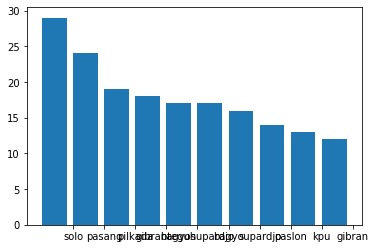

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

word_list = token

counts = Counter(word_list)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]
indSort = indSort[0:10]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.6

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

In [ ]:
labels

array(['solo', 'pasang', 'pilkada', 'gibranteguh', 'bagyosupardjo',
       'bagyo', 'supardjo', 'paslon', 'kpu', 'gibran'], dtype='<U19')

In [ ]:
values

array([29, 24, 19, 18, 17, 17, 16, 14, 13, 12])

## Sentiment Generation Using Lexicon Based Method

In [ ]:
positive = pd.read_csv('/content/gdrive/My Drive/Sentimen Analisis/positive.txt', header=None)
positive = positive[0].values.tolist()
positive = '|'.join(positive)

negative = pd.read_csv('/content/gdrive/My Drive/Sentimen Analisis/negative.txt', header=None)
negative = negative[0].values.tolist()
negative = '|'.join(negative)

In [ ]:
df = pd.DataFrame(sw) 
df.head()

,0
0,gibranteguh bagyosupardjo samasama menang pilk...
1,pasang calon paslon pilkada solo tahap undi no...
2,pasang calon paslon pilkada solo tahap undi no...
3,selamat pagi assalamualaikum wr wb moga patuh ...
4,gibranteguh bagyosupardjo samasama pede menang...


In [ ]:
names = df.columns.tolist()
names[names.index(0)] = 'clean_text'
df.columns = names
names

['clean_text']

In [ ]:
df.tail()

,clean_text
41,gibranteguh amp bagyosupardjo samasama tak uang
42,pasang bagyo wahyono fx supardjo bajo ramai pi...
43,kisah warga solo rela serah ktp dukung calon i...
44,kpu verifikasi ktp warga solo dukung bagyosupa...
45,rival dlm calon gibran rakabuming raka teguh p...


In [ ]:
df=df.drop(df[df.clean_text.map(len)==0].index)

In [ ]:
a=0
for i in df.clean_text:
  kata_positif= len(re.findall(positive, i))
  #print(kata_positif)
  jumlah_kata = len(i.split())
  #print(jumlah_kata)
  positive_score = kata_positif/jumlah_kata
  #print(positive_score)
  a=a+1
  #print(a)

In [ ]:
df['positive'] = [len(re.findall(positive, i.lower())) / len(i.split()) for i in df.clean_text]
df['negative'] = [len(re.findall(negative, i.lower())) / len(i.split()) for i in df.clean_text]

In [ ]:
df['sentimen'] = ['positive' if df.iloc[i].positive >= df.iloc[i].negative else 'negative' for i in range(df.shape[0])]

In [ ]:
df['score'] = df['positive']- df['negative']

In [ ]:
def sentimen(df):
    if df['score'] > 0:
        val = "Positive"
    elif df['score'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

In [ ]:
df.head()

,clean_text,positive,negative,sentimen,score
0,gibranteguh bagyosupardjo samasama menang pilk...,0.333333,0.166667,positive,0.166667
1,pasang calon paslon pilkada solo tahap undi no...,0.285714,0.071429,positive,0.214286
2,pasang calon paslon pilkada solo tahap undi no...,0.307692,0.076923,positive,0.230769
3,selamat pagi assalamualaikum wr wb moga patuh ...,0.307692,0.153846,positive,0.153846
4,gibranteguh bagyosupardjo samasama pede menang...,0.285714,0.142857,positive,0.142857


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df['sentimen'].value_counts()

positive    42
negative     4
Name: sentimen, dtype: int64

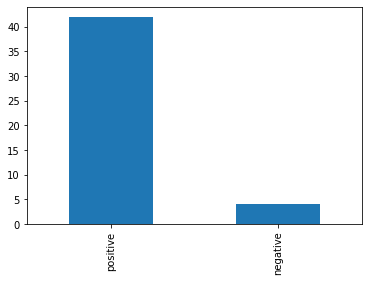

In [ ]:
df['sentimen'].value_counts().plot(kind='bar');